In [1]:
pip install diffusers transformers accelerate torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


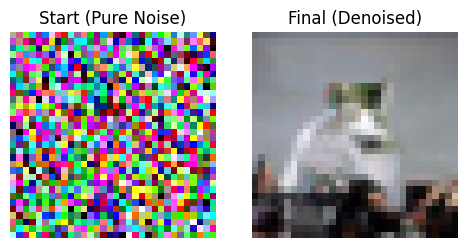

In [5]:
from diffusers import DDPMScheduler
import matplotlib.pyplot as plt
import torch

# Set up the same pretrained model and scheduler
from diffusers import DDPMPipeline

pipeline = DDPMPipeline.from_pretrained("google/ddpm-cifar10-32")
pipeline = pipeline.to("cuda" if torch.cuda.is_available() else "cpu")
scheduler = pipeline.scheduler
unet = pipeline.unet

# Step 1: Start with pure noise
num_steps = 50
noise = torch.randn(1, 3, 32, 32).to(pipeline.device)  # shape: [B, C, H, W]
x = noise.clone()  # Save for plotting

# Step 2: Denoise step by step
for t in scheduler.timesteps:
    with torch.no_grad():
        # Predict noise in image
        noise_pred = unet(x, t).sample
    # Compute previous x_t using the scheduler
    x = scheduler.step(noise_pred, t, x).prev_sample

# Convert to PIL
from torchvision.transforms.functional import to_pil_image

start_image = to_pil_image((noise[0].cpu() * 0.5 + 0.5).clamp(0, 1))  # [-1, 1] → [0, 1]
final_image = to_pil_image((x[0].cpu() * 0.5 + 0.5).clamp(0, 1))

# Step 3: Plot side by side
plt.figure(figsize=(5, 2.5))

plt.subplot(1, 2, 1)
plt.imshow(start_image, interpolation='nearest')
plt.axis("off")
plt.title("Start (Pure Noise)")

plt.subplot(1, 2, 2)
plt.imshow(final_image, interpolation='nearest')
plt.axis("off")
plt.title("Final (Denoised)")

plt.tight_layout()
plt.show()
